Exercise in section 2.1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D

In [5]:
a = 1/2
N = 8
E_0 = 1/2

In [3]:
def V_harmonic_oscillator(x: float):
    return x**2 / 2

def psi_ground(x: float):
    return np.exp(-x**2 / 2) / np.pi**(1/4)

In [4]:
harmonic_oscillator = NonRelativisticSingleParticle1D(V=V_harmonic_oscillator, T=N*a, N=N)

In [9]:
x_exact = np.linspace(0.0, 2.0, 50)
x_pimc = np.linspace(0.0, 2.0, 10)

propagators_exact = harmonic_oscillator.compute_propagator_from_ground_state(x_exact, ground_energy=E_0, ground_wavefunction=psi_ground)
propagators_pimc_results = harmonic_oscillator.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

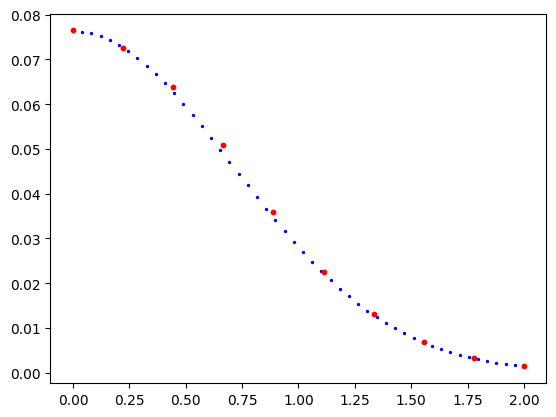

In [10]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()

In [12]:
for result in propagators_pimc_results:
    print(result.Q)

0.6558724583472266
0.21347211137812386
0.6003885711847878
0.8583287452691102
0.1478312164304999
0.5494848998530497
0.1099814427511693
0.5035949004627933
0.7437112847464594
0.15863245032036558


If all Qs are greater than $0.05$, it means that all points are statistically significant. 

TODO:
- Refactor (generalize code)
- Output the goodness of the integration procedures
- Compare quantitatively Monte Carlo vs exact
- Prove that A is good also for x^4 / 2

# Potential $x^4/2$

In [ ]:
# TODO: rewrite using factored code

In [1]:
from lqfn.numerical.schrodinger.numerov import get_eigenvalues, get_eigenfunction

In [2]:
def V_x4(x: float):
    return x ** 4 / 2

In [7]:
x4_system = NonRelativisticSingleParticle1D(V=V_x4, T=N*a, N=N)

In [8]:
x_exact = np.linspace(0.0, 2.0, 50)
x_pimc = np.linspace(0.0, 2.0, 10)

In [21]:
# propagators_exact = x4_system.compute_propagator_from_ground_state(x_exact)
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

In [6]:
for result in propagators_pimc_results:
    print(result.Q)

NameError: name 'propagators_pimc_results' is not defined

Compute using Schrodinger equation solution using Numerov

In [9]:
dx = 2.0/x_exact.shape[0]
energies = get_eigenvalues(V_x4(x_exact), x_exact, dx, 0.0, 5.0)
ground_wavefunction = get_eigenfunction(V_x4(x_exact), x_exact, dx, energies[0])

In [ ]:
def compute_propagator_4(x, E_0):
    index = int((x - LOWER_BOUND) // dx)
    return eigenfunctions[0][index]**2 * np.exp(-E_0*T)

In [14]:
x_exact

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

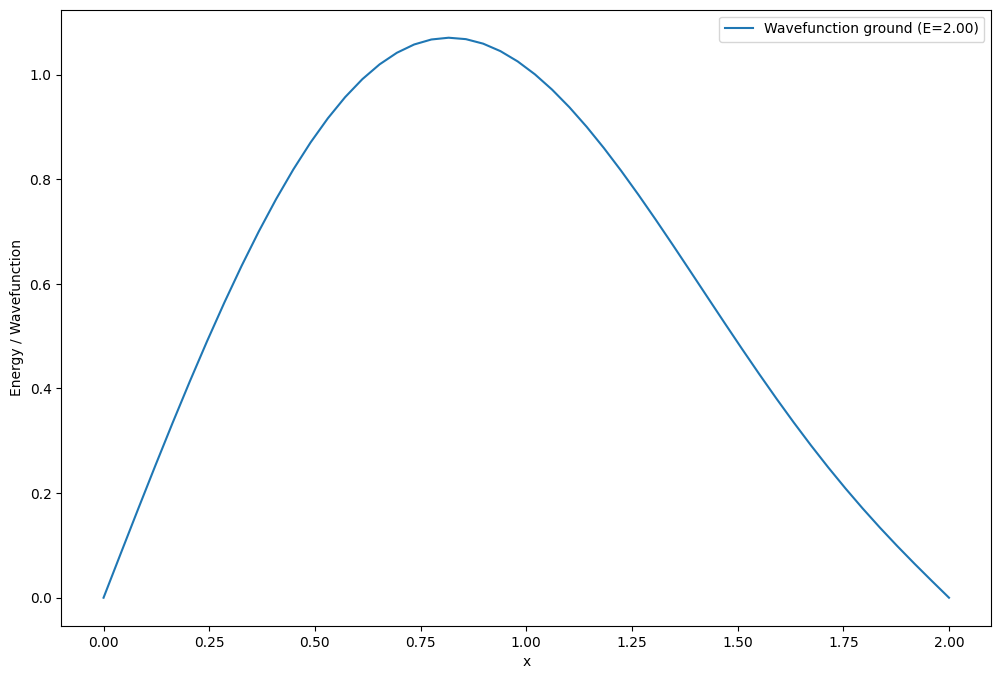

In [15]:
# Plot the potential and the first few eigenfunctions
plt.figure(figsize=(12, 8))
# plt.plot(X, V, label='Potential V(x) = x^4 / 2')
vals = np.array([ground_wavefunction(x) for x in x_exact])
plt.plot(x_exact, vals, label=f'Wavefunction ground (E={energies[0]:.2f})')


plt.xlabel('x')
plt.ylabel('Energy / Wavefunction')
plt.legend()
plt.show()

In [ ]:
theoretical_predictions = []
for x in x_exact:
    theoretical_predictions.append(compute_propagator_4(x, eigenvalues[0]))
theoretical_predictions = np.array(theoretical_predictions)

In [ ]:
means

array([7.73111155e-02, 7.30085252e-02, 6.42857039e-02, 4.87824973e-02,
       3.08246832e-02, 1.65981539e-02, 6.51765157e-03, 1.75998927e-03,
       2.85511098e-04, 2.64690977e-05])

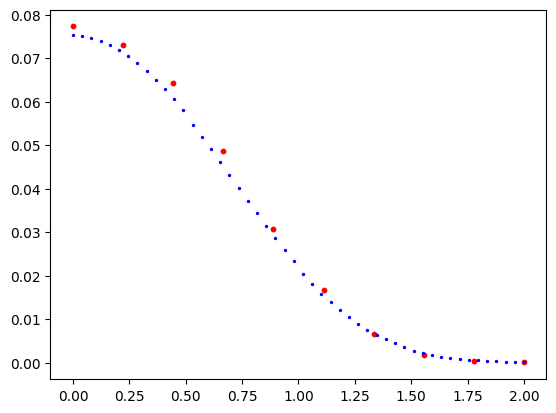

In [ ]:
plt.scatter(x_PI, means, s=10, color='red')
plt.scatter(x_exact, theoretical_predictions, s=2, color='blue')
plt.show()

In [ ]:
for i in range(len(results)):
    print(results[i].summary())
    print()
    print()
    print()

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.0818(75)      0.0818(75)          0.00     1.00
  2   0.0728(97)      0.0784(60)          0.54     0.46
  3   0.0930(94)      0.0826(50)          1.12     0.33
  4   0.0804(55)      0.0816(37)          0.78     0.51
  5   0.0756(46)      0.0793(29)          0.84     0.50
  6   0.0719(40)      0.0768(24)          1.11     0.35
  7   0.0762(51)      0.0767(21)          0.93     0.47
  8   0.0716(44)      0.0757(19)          0.95     0.47
  9   0.0804(59)      0.0761(18)          0.90     0.51
 10   0.090(11)       0.0765(18)          0.96     0.47
 11   0.0863(90)      0.0769(18)          0.98     0.46
 12   0.0858(63)      0.0775(17)          1.06     0.39
 13   0.0753(43)      0.0772(16)          0.99     0.46
 14   0.0784(47)      0.0773(15)          0.92     0.53
 15   0.0723(45)      0.0769(14)          0.93     0.52
 16   0.0837(46)      0.0775(14)          1.01  